![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/55482509-12ad2480-55fb-11e9-9bca-ea2281b69c27.png"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Data Analysis

We'll use a Dataset from IBM that has information for a big telecommunications company ([dataset source](https://www.ibm.com/communities/analytics/watson-analytics-blog/predictive-insights-in-the-telco-customer-churn-data-set/)). You can check the CSV (and an MS Excel version) in the `data/` directory.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.float_format', '{:,.3f}'.format)

In [3]:
sns.set_palette('Set2')

In [4]:
sns.set_palette('Paired')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [5]:
df = pd.read_csv('data/cleaned_dataset_1.csv', index_col='customerID')

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,False
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,"1,889.500",False
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,True
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,"1,840.750",False
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null bool
dtypes: bool(1), float64(2), int64(2), object(15)
memory usage: 1

In [7]:
active_df = df.loc[~df['Churn']]

In [8]:
inactive_df = df.loc[df['Churn']]

In [9]:
df['Tenure Category'] = pd.cut(df['tenure'], [-1, 6, 20, 40, 60, df['tenure'].max()], labels=['less than 6', '6 to 20', '20 to 40', '40 to 60', 'more than 60'])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Exploratory Analysis

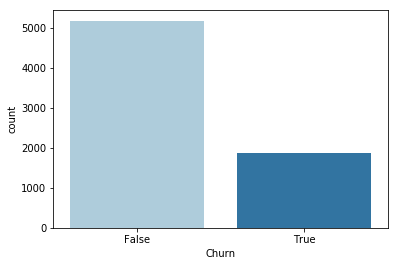

In [10]:
sns.countplot('Churn', data=df)

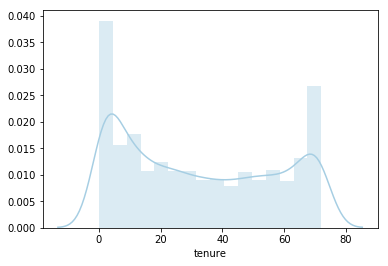

In [11]:
sns.distplot(df['tenure'])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## How is churned affected by tenure?

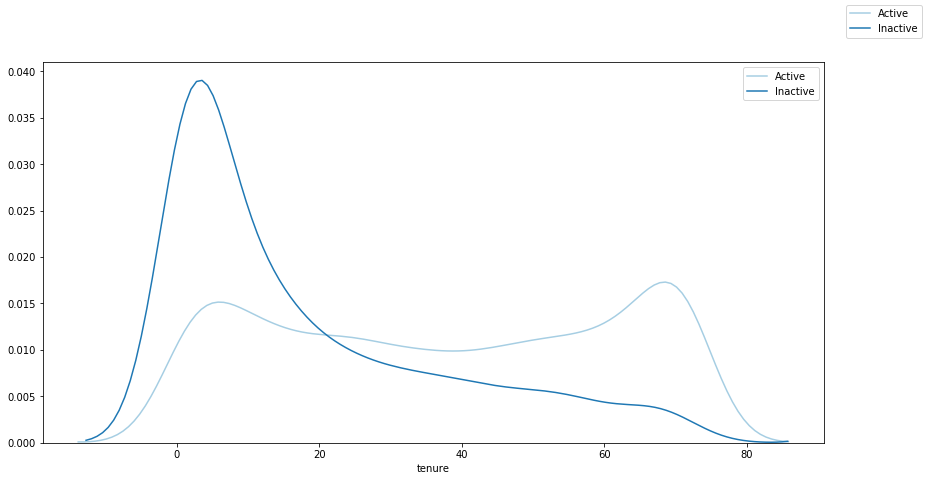

In [12]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.distplot(active_df['tenure'], label="Active", hist=False, rug=False, ax=ax)
sns.distplot(inactive_df['tenure'], label="Inactive", hist=False, rug=False, ax=ax)

fig.legend()

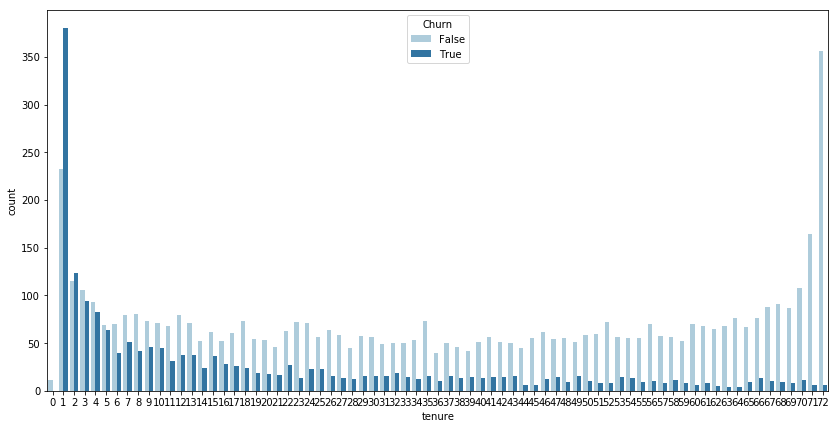

In [13]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='tenure', hue='Churn', data=df, ax=ax)

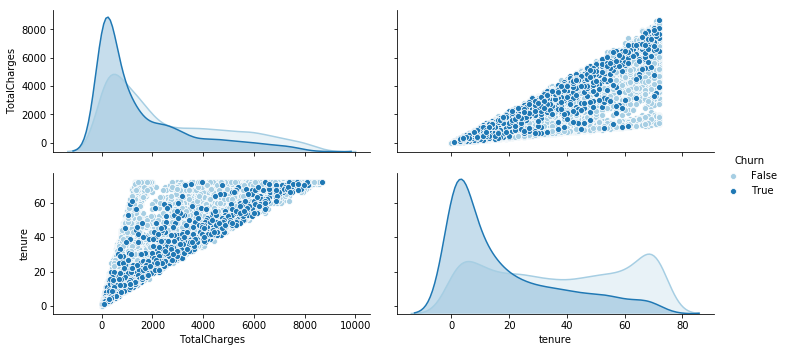

In [14]:
sns.pairplot(df, hue='Churn', vars=['TotalCharges', 'tenure'], aspect=2)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## By InternetService

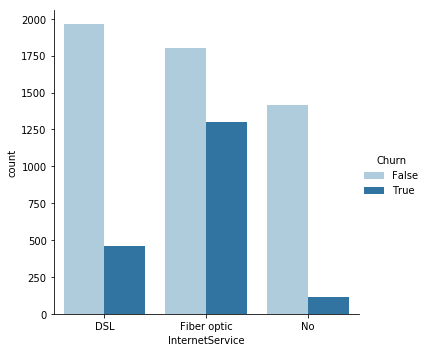

In [15]:
sns.catplot(x="InternetService", kind="count", hue='Churn', data=df)

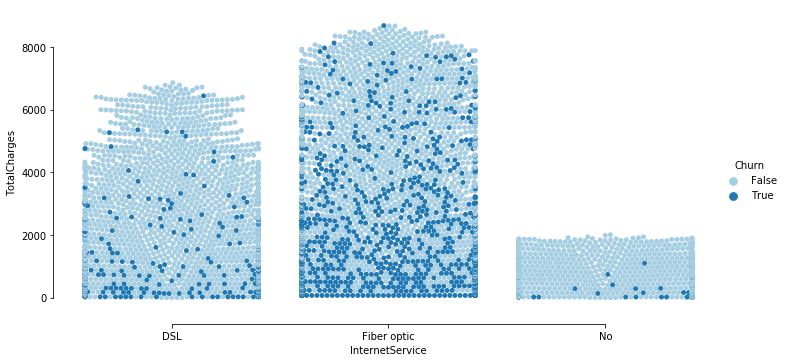

In [16]:
sns.catplot(x="InternetService", y="TotalCharges", hue="Churn", kind="swarm", data=df, aspect=2)
sns.despine(offset=10, trim=True)

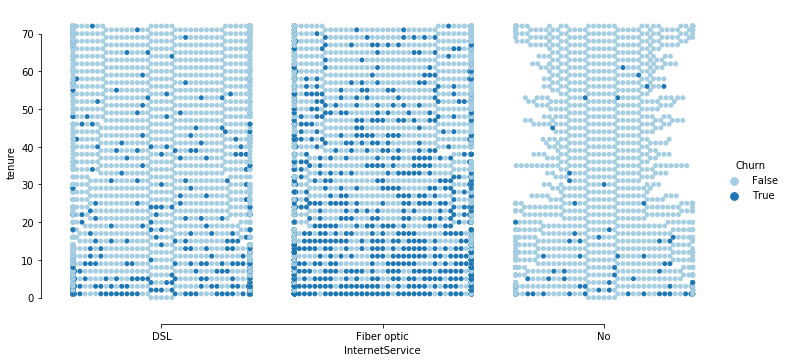

In [17]:
sns.catplot(x="InternetService", y="tenure", hue="Churn", kind="swarm", data=df, aspect=2)
sns.despine(offset=10, trim=True)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Online Services

In [18]:
import itertools

In [19]:
combinations = [
    [item for item in itertools.combinations(['Online Security', 'Online Backup', 'Device Protection'], i)]
    for i in range(1, 4)]
[", ".join(elems) for elems in sum(combinations, [])]

['Online Security',
 'Online Backup',
 'Device Protection',
 'Online Security, Online Backup',
 'Online Security, Device Protection',
 'Online Backup, Device Protection',
 'Online Security, Online Backup, Device Protection']

In [20]:
internet_df = df.loc[df['InternetService'] != 'No']

In [21]:
internet_df = internet_df.replace({
    'OnlineSecurity': {
        'Yes': True,
        'No': False
    },
    'OnlineBackup': {
        'Yes': True,
        'No': False
    },
    'DeviceProtection': {
        'Yes': True,
        'No': False
    },
})

In [22]:
def expand_internet_category(row):
    services = set()
    if row['OnlineSecurity']:
        services.add('Online Security')
    if row['OnlineBackup']:
        services.add('Online Backup')
    if row['DeviceProtection']:
        services.add('Device Protection')
    if not services:
        return 'No Services'
    
    return ", ".join(services)

In [23]:
internet_df['Combined Internet Services'] = internet_df.apply(expand_internet_category, axis=1)

In [24]:
internet_df['Combined Internet Services'].value_counts()

No Services                                          1509
Online Backup, Device Protection, Online Security     693
Device Protection                                     686
Online Backup                                         678
Online Backup, Device Protection                      625
Online Security                                       475
Online Backup, Online Security                        433
Device Protection, Online Security                    418
Name: Combined Internet Services, dtype: int64

In [25]:
from pandas.api.types import CategoricalDtype

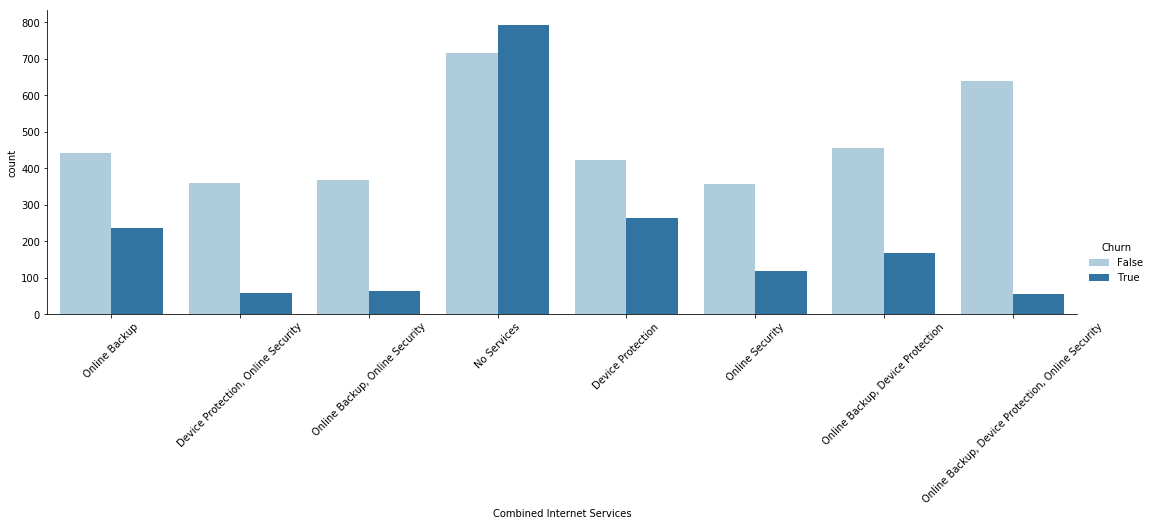

In [26]:
cat_plot = sns.catplot(x="Combined Internet Services", kind="count", hue='Churn', data=internet_df, aspect=3)
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in cat_plot.axes.flat]
cat_plot

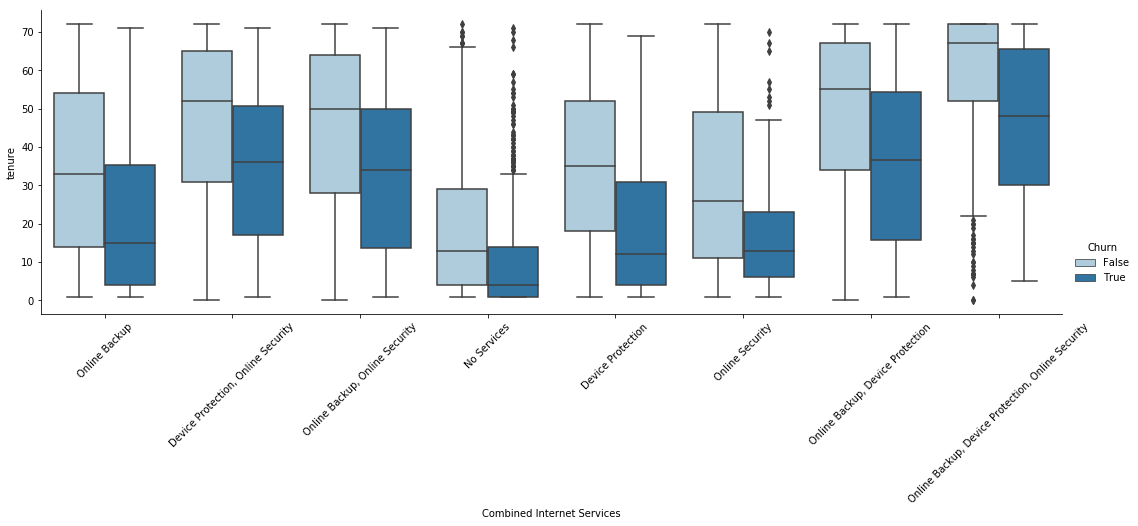

In [27]:
cat_plot = sns.catplot(x="Combined Internet Services", y='tenure', kind="box", hue='Churn', data=internet_df, aspect=3)
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in cat_plot.axes.flat]
cat_plot

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)